In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df1 = pd.read_csv('mushroom.zip')

In [3]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df1.loc[::-1,::-1].head()

,habitat,population,spore-print-color,ring-type,ring-number,veil-color,veil-type,stalk-color-below-ring,stalk-color-above-ring,stalk-surface-below-ring,...,gill-color,gill-size,gill-spacing,gill-attachment,odor,bruises,cap-color,cap-surface,cap-shape,class
8123,l,c,o,p,o,o,p,o,o,s,...,y,b,c,a,n,f,n,s,x,e
8122,l,v,w,e,o,w,p,w,w,k,...,b,n,c,f,y,f,n,y,k,p
8121,l,c,b,p,o,o,p,o,o,s,...,n,b,c,a,n,f,n,s,f,e
8120,l,v,b,p,o,n,p,o,o,s,...,y,b,c,a,n,f,n,s,x,e
8119,l,c,b,p,o,o,p,o,o,s,...,y,b,c,a,n,f,n,s,k,e


In [5]:
df1.shape

(8124, 23)

In [6]:
df1.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df1.iloc[:,1:].describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df1.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
mapping_categorical=[{'e':1,'p':0},
         {'b':0,'c':1,'x':2,'f':3, 'k':4,'s':5},
         {'f':0,'g':1,'y':2,'s':3},
         {'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9},
         {'t':1,'f':0},
         {'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':0,'p':7,'s':8},
         {'a':0,'d':1, 'f':2, 'n':3},
         {'c':0,'w':1,'d':2},
         {'b':0,'n':1},
         {'k':0,'n':1,'b':2,'h':3,'g':4,'r':5,'o':6,'p':7,'u':8,'e':9,'w':10,'y':11},
         {'e':0,'t':1},{'b':0,'c':1,'u':2,'e':3,'z':4,'r':5,'?':6},
         {'f':0,'y':1,'k':2,'s':3},
         {'f':0,'y':1,'k':2,'s':3},
         {'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':5,'w':6,'y':7},
         {'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':6,'w':7,'y':8},
         {'p':0,'u':1},
         {'n':0,'o':1,'w':2,'y':3},
         {'n':0,'o':1,'t':2},
         {'c':4,'e':1,'f':2,'l':3,'n':0,'p':5,'s':6,'z':7},
         {'k':0,'n':1,'b':2,'h':3,'r':4,'o':5,'u':6,'w':7,'y':8},
         {'a':0,'c':1,'n':2,'s':3,'v':4,'y':5},
         {'g':0,'l':1,'m':2,'p':3,'u':4,'w':5,'d':6}]

In [10]:
len(mapping_categorical),len(df1.columns)

(23, 23)

In [11]:
for i in range(len(df1.columns)):
    df1[df1.columns[i]] = df1[df1.columns[i]].map(mapping_categorical[i]).astype(int)

In [12]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,0,1,7,2,0,1,0,...,3,6,7,0,2,1,5,0,3,4
1,1,2,3,9,1,1,2,0,0,0,...,3,6,7,0,2,1,5,1,2,0
2,1,0,3,8,1,2,2,0,0,1,...,3,6,7,0,2,1,5,1,2,2
3,0,2,2,8,1,7,2,0,1,1,...,3,6,7,0,2,1,5,0,3,4
4,1,2,3,3,0,0,2,1,0,0,...,3,6,7,0,2,1,1,1,0,0


In [13]:
df1['veil-type'].unique()

array([0])

In [14]:
df2 = df1.drop('veil-type',axis=1)

C:\Users\Sai Sridhar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
C:\Users\Sai Sridhar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


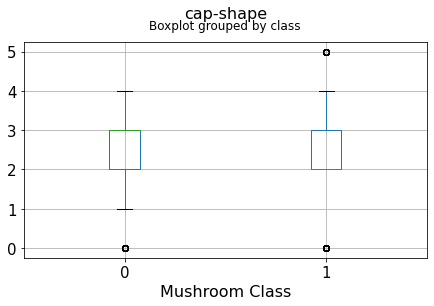

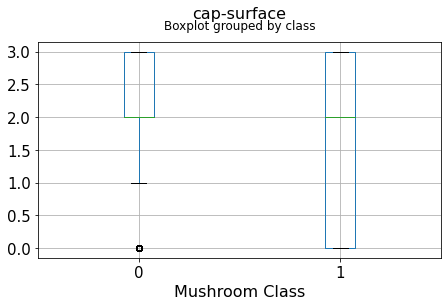

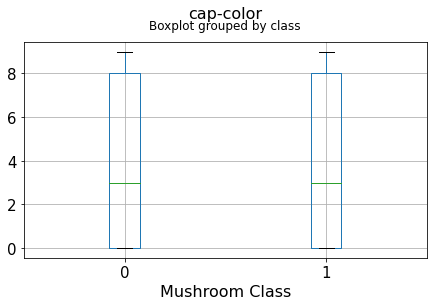

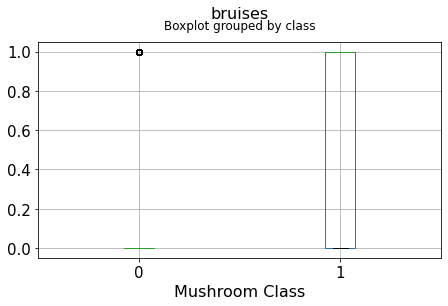

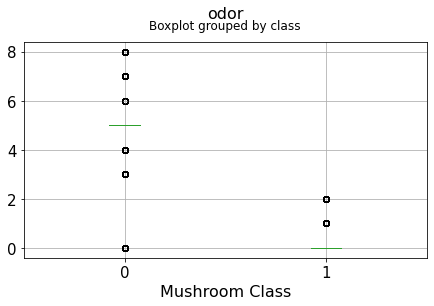

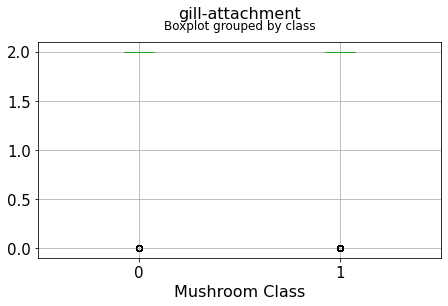

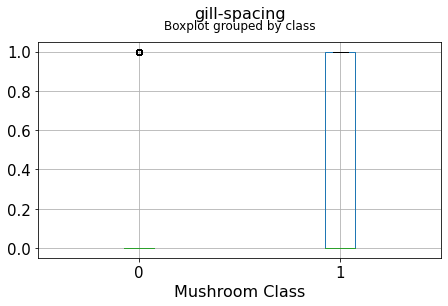

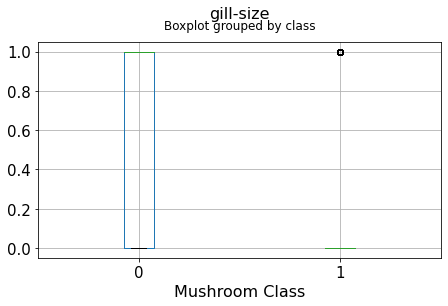

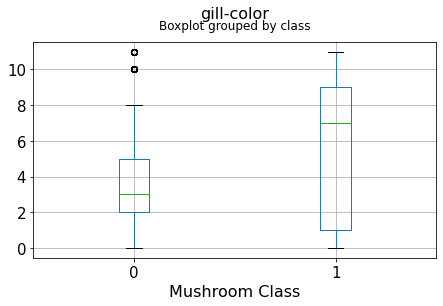

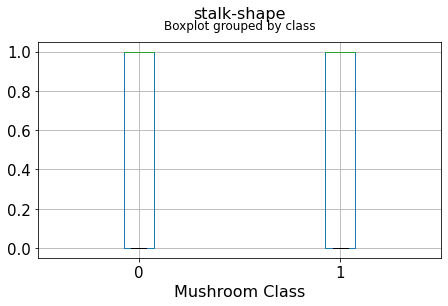

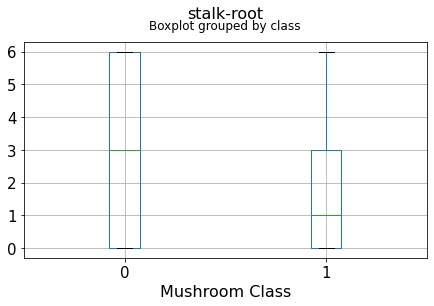

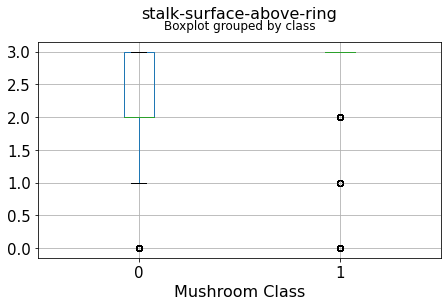

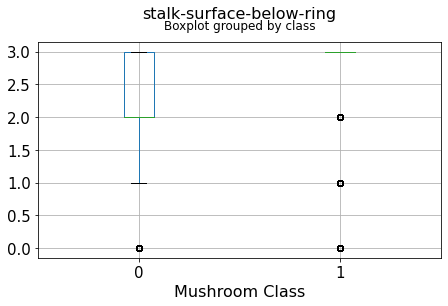

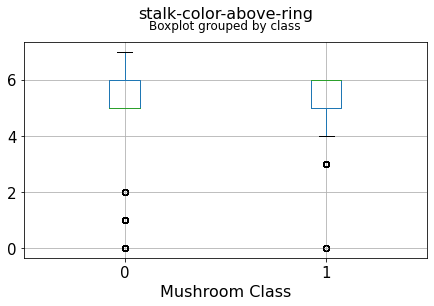

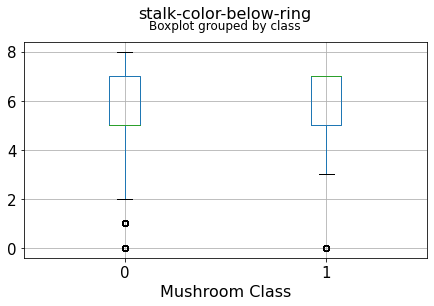

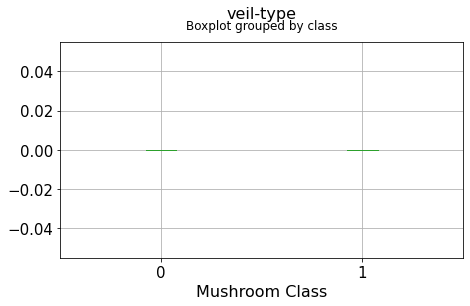

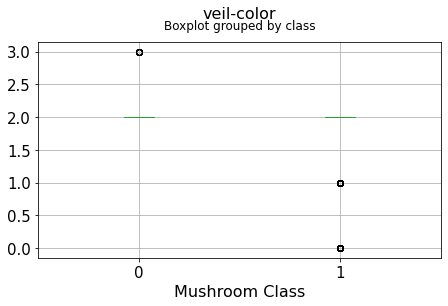

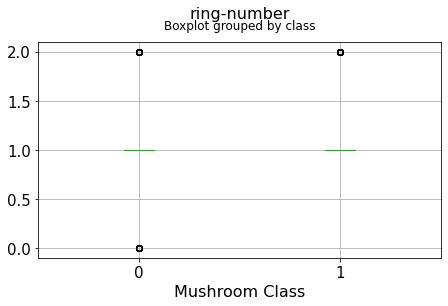

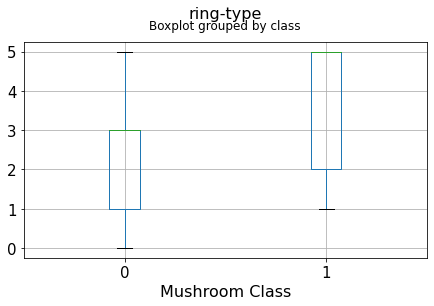

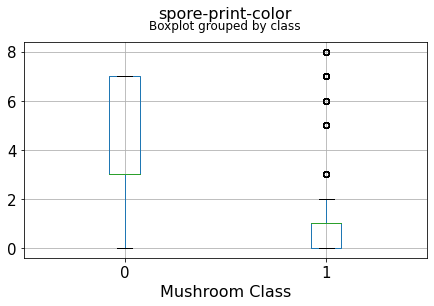

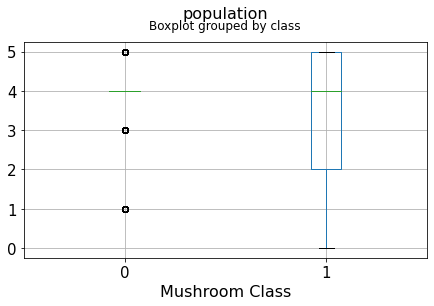

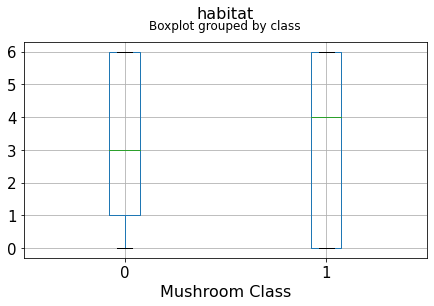

In [15]:
for i in df1.columns[1:]:
    df1.boxplot(i,by='class',figsize=(7,4),fontsize=15)
    plt.title("{}\n".format(i),fontsize=16)
    plt.xlabel("Mushroom Class", fontsize=16)

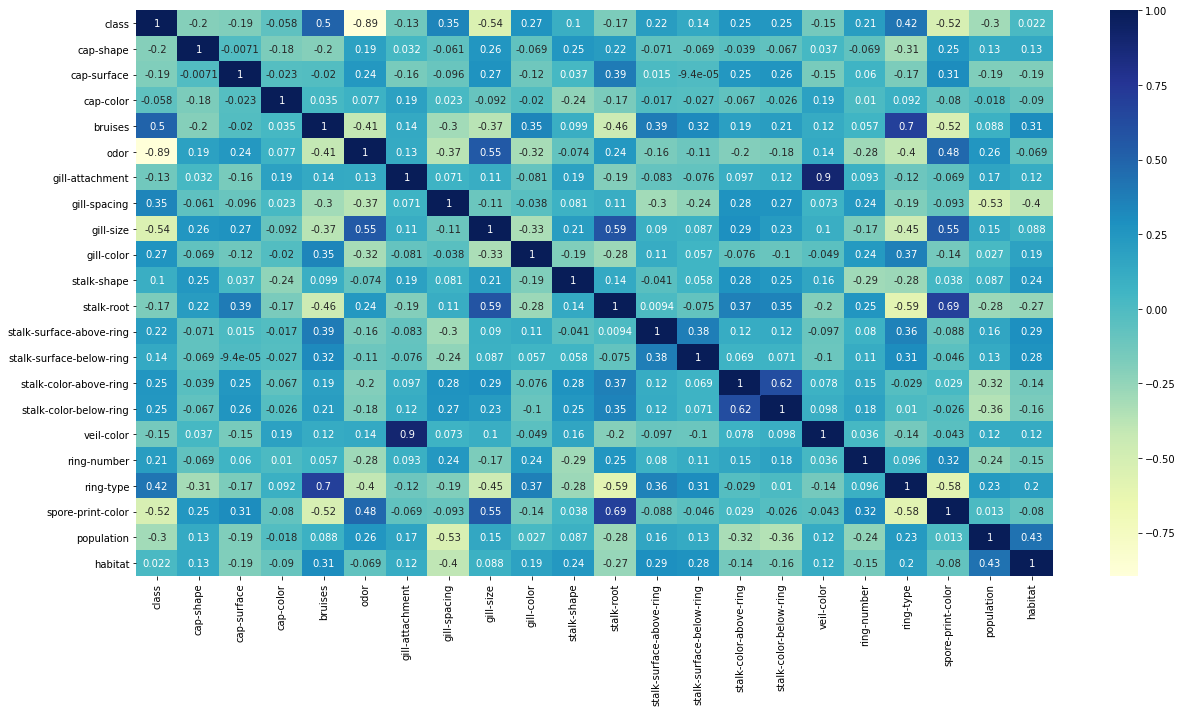

In [18]:
import seaborn as sns
fig = plt.figure(figsize=(18,10))
sns.heatmap(df2.dropna().corr(),annot=True,cmap="YlGnBu")
plt.tight_layout()

In [19]:
df2.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.199488,-0.186806,-0.058452,0.501530,-0.894787,-0.129200,0.348387,-0.540024,0.270247,...,0.215088,0.139254,0.253251,0.245231,-0.145142,0.214366,0.419044,-0.519438,-0.298686,0.022363
cap-shape,-0.199488,1.000000,-0.007059,-0.176574,-0.199703,0.186701,0.032099,-0.061368,0.259001,-0.069180,...,-0.070942,-0.068732,-0.039429,-0.067470,0.036995,-0.069245,-0.308069,0.251207,0.129000,0.134210
cap-surface,-0.186806,-0.007059,1.000000,-0.022923,-0.019547,0.240408,-0.161757,-0.096076,0.274933,-0.122924,...,0.015424,-0.000094,0.251011,0.260090,-0.154804,0.060429,-0.172302,0.310188,-0.188979,-0.191609
cap-color,-0.058452,-0.176574,-0.022923,1.000000,0.034513,0.077232,0.192322,0.023269,-0.091914,-0.020306,...,-0.017087,-0.026967,-0.066643,-0.025502,0.188903,0.010226,0.091632,-0.079787,-0.017712,-0.089724
bruises,0.501530,-0.199703,-0.019547,0.034513,1.000000,-0.411035,0.137359,-0.299473,-0.369596,0.348658,...,0.386893,0.323013,0.193354,0.213054,0.119770,0.056788,0.696406,-0.519982,0.088137,0.305354
odor,-0.894787,0.186701,0.240408,0.077232,-0.411035,1.000000,0.126963,-0.371744,0.550909,-0.317207,...,-0.163921,-0.112837,-0.196218,-0.179177,0.137413,-0.283660,-0.399696,0.481270,0.258395,-0.069010
gill-attachment,-0.129200,0.032099,-0.161757,0.192322,0.137359,0.126963,1.000000,0.071489,0.108984,-0.080726,...,-0.083189,-0.075554,0.097414,0.116158,0.897518,0.093236,-0.116477,-0.068909,0.165575,0.115387
gill-spacing,0.348387,-0.061368,-0.096076,0.023269,-0.299473,-0.371744,0.071489,1.000000,-0.108333,-0.037735,...,-0.298008,-0.241945,0.278873,0.271301,0.073363,0.243014,-0.190251,-0.092992,-0.529253,-0.397884
gill-size,-0.540024,0.259001,0.274933,-0.091914,-0.369596,0.550909,0.108984,-0.108333,1.000000,-0.330580,...,0.090346,0.087102,0.293684,0.228629,0.103809,-0.171362,-0.451139,0.549444,0.147682,0.088058
gill-color,0.270247,-0.069180,-0.122924,-0.020306,0.348658,-0.317207,-0.080726,-0.037735,-0.330580,1.000000,...,0.114802,0.057044,-0.075778,-0.101458,-0.048532,0.235151,0.369665,-0.144126,0.027168,0.185011


### Naive-Bayes 

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
test_size=0.2

In [25]:
X = df1.drop('class',axis=1)
y = df1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [26]:
X_train.shape

(6499, 22)

In [29]:
X_test.shape

(1625, 22)

In [30]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2349,3,0,0,1,0,2,0,0,8,1,...,3,3,7,0,2,1,5,1,5,6
6475,3,2,7,0,4,2,0,1,2,1,...,2,6,5,0,2,1,1,7,4,6
577,2,3,9,1,2,2,0,0,1,0,...,3,6,7,0,2,1,5,1,3,0
6760,2,3,0,0,4,2,0,1,2,1,...,2,5,5,0,2,1,1,7,4,6
5358,3,2,3,0,5,2,0,0,7,0,...,2,5,5,0,2,1,3,3,5,3


In [32]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train,y_train)

GaussianNB()

### Prediction, classification report, confusion matrix

In [34]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 1625 test samples is 79


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       779
           1       0.95      0.96      0.95       846

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [42]:
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2'], columns=['Class 1','Class 2'])
cmdf

,Class 1,Class 2
Class 1,733,33
Class 2,46,813


In [43]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

95.13846153846154